**# **Load and Explore the Dataset****

#**Download Dataset**

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ilhamfp31/yelp-review-dataset")

print("Path to dataset files:", path)

100%|██████████| 162M/162M [00:01<00:00, 89.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ilhamfp31/yelp-review-dataset/versions/2


# **Load and Explore the Dataset**

In [2]:
import pandas as pd

# Load the train and test datasets
train_path = '/root/.cache/kagglehub/datasets/ilhamfp31/yelp-review-dataset/versions/2/yelp_review_polarity_csv/train.csv'
test_path = '/root/.cache/kagglehub/datasets/ilhamfp31/yelp-review-dataset/versions/2/yelp_review_polarity_csv/test.csv'

# Load the datasets
train_df = pd.read_csv(train_path, header=None)
test_df = pd.read_csv(test_path, header=None)

# Display the first few rows of the train and test datasets
print("Training Set:")
print(train_df.head())
print("\nTesting Set:")
print(test_df.head())

# Check the shape of the data
print(f"\nTrain Shape: {train_df.shape}, Test Shape: {test_df.shape}")

# Check for missing values
print("\nMissing Values in Train:", train_df.isnull().sum())
print("Missing Values in Test:", test_df.isnull().sum())


Training Set:
   0                                                  1
0  1  Unfortunately, the frustration of being Dr. Go...
1  2  Been going to Dr. Goldberg for over 10 years. ...
2  1  I don't know what Dr. Goldberg was like before...
3  1  I'm writing this review to give you a heads up...
4  2  All the food is great here. But the best thing...

Testing Set:
   0                                                  1
0  2  Contrary to other reviews, I have zero complai...
1  1  Last summer I had an appointment to get new ti...
2  2  Friendly staff, same starbucks fair you get an...
3  1  The food is good. Unfortunately the service is...
4  2  Even when we didn't have a car Filene's Baseme...

Train Shape: (560000, 2), Test Shape: (38000, 2)

Missing Values in Train: 0    0
1    0
dtype: int64
Missing Values in Test: 0    0
1    0
dtype: int64


# **Text Preprocessing:**






# 1- Lowercasing and Removing Punctuation

In [3]:
import re

# Lowercase and remove punctuation function
def preprocess_text_step1(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply the first preprocessing step to train and test datasets
train_df[1] = train_df[1].apply(preprocess_text_step1)
test_df[1] = test_df[1].apply(preprocess_text_step1)

# Display the first few rows of the preprocessed training data
print("After Lowercasing and Removing Punctuation:")
print(train_df.head())

After Lowercasing and Removing Punctuation:
   0                                                  1
0  1  unfortunately the frustration of being dr gold...
1  2  been going to dr goldberg for over  years i th...
2  1  i dont know what dr goldberg was like before  ...
3  1  im writing this review to give you a heads up ...
4  2  all the food is great here but the best thing ...


# 2- Tokenization and Stop Words Removal

In [4]:
import nltk
from nltk.corpus import stopwords

# Download stopwords (run this once if needed)
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Tokenization and stopword removal function
def preprocess_text_step2(text):
    # Tokenize the text (split into words)
    words = text.split()
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Join the words back into a single string
    return ' '.join(words)

# Apply tokenization and stop word removal to train and test datasets
train_df[1] = train_df[1].apply(preprocess_text_step2)
test_df[1] = test_df[1].apply(preprocess_text_step2)

# Display the first few rows of the processed training data
print("After Step 2 - Tokenization and Stop Word Removal:")
print(train_df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After Step 2 - Tokenization and Stop Word Removal:
   0                                                  1
0  1  unfortunately frustration dr goldbergs patient...
1  2  going dr goldberg years think one st patients ...
2  1  dont know dr goldberg like moving arizona let ...
3  1  im writing review give heads see doctor office...
4  2  food great best thing wings wings simply fanta...


# 3- Vectorization using TF-IDF


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization (convert text into numerical form)
tfidf = TfidfVectorizer(max_features=5000)  # Use the top 5000 most common words

# Fit the TF-IDF model on the training data and transform both train and test sets
X_train = tfidf.fit_transform(train_df[1])  # Train data
X_test = tfidf.transform(test_df[1])        # Test data

# Labels (use the first column as labels)
y_train = train_df[0]  # Labels for training set
y_test = test_df[0]    # Labels for testing set

# Display the shape of the transformed data
print(f"\nTransformed Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")


Transformed Train Shape: (560000, 5000), Test Shape: (38000, 5000)


# **Visualize Model Performance**


Accuracy: 0.9253

Confusion Matrix:
[[17585  1415]
 [ 1422 17578]]

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.93      0.93     19000
           2       0.93      0.93      0.93     19000

    accuracy                           0.93     38000
   macro avg       0.93      0.93      0.93     38000
weighted avg       0.93      0.93      0.93     38000



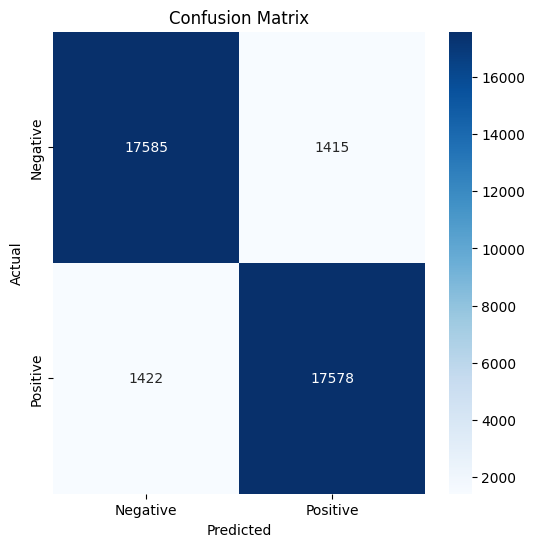

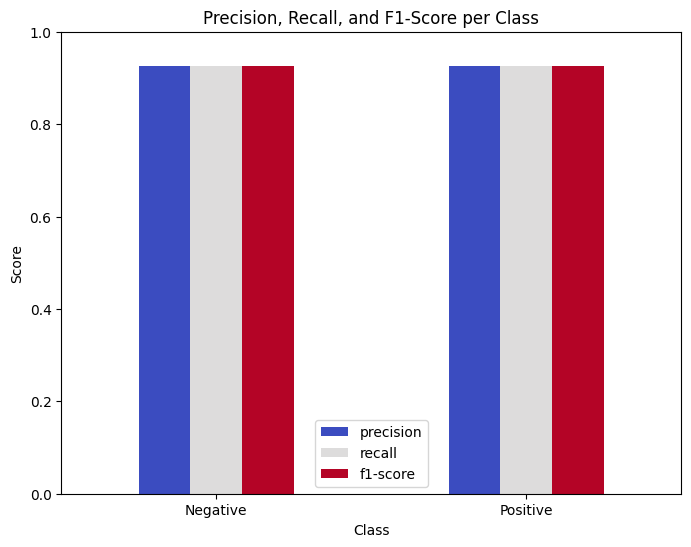

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression # Assuming you want to use Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Visualize the Confusion Matrix (as we did previously)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize Precision, Recall, and F1-Score (
import pandas as pd

# Get the classification report as a dictionary
class_report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert it to a DataFrame for easy plotting
report_df = pd.DataFrame(class_report_dict).transpose()

# Plot Precision, Recall, and F1-Score
report_df[['precision', 'recall', 'f1-score']].iloc[:2].plot(kind='bar', figsize=(8, 6), colormap='coolwarm')
plt.title('Precision, Recall, and F1-Score per Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.ylim(0, 1)
plt.show()

# **Visualize Common Words**

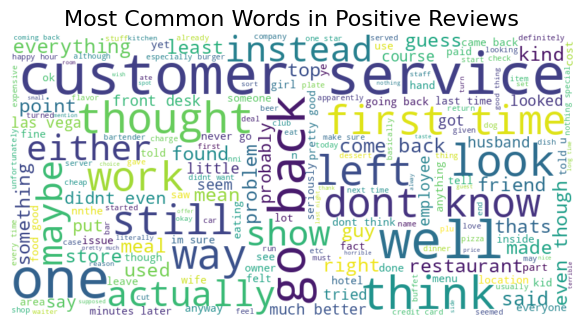

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the reviews into one string for both positive reviews
negative_reviews = ' '.join(train_df[train_df[0] == 1][1])  # Negative reviews

# Create word clouds for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Positive review word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Most Common Words in Positive Reviews', fontsize=16)
plt.axis('off')



plt.show()

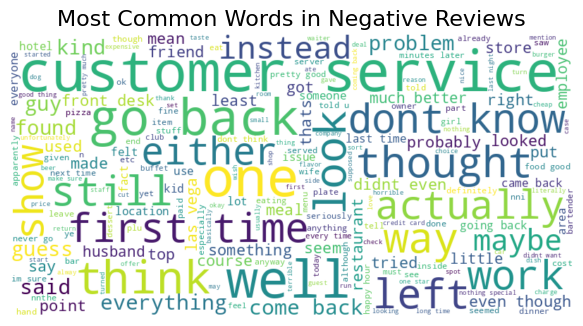

In [ ]:
# Join all the reviews into one string for both positive and negative reviews
negative_reviews = ' '.join(train_df[train_df[0] == 1][1])  # Negative reviews

# Create word clouds fornegative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(16, 8))

# Negative review word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Most Common Words in Negative Reviews', fontsize=16)
plt.axis('off')

plt.show()

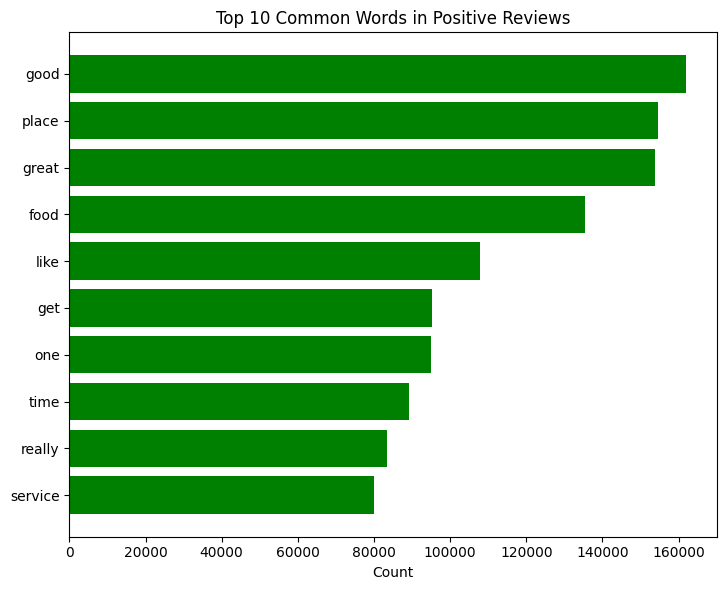

In [ ]:
from collections import Counter


# Tokenize the reviews and count the most common words
positive_words = ' '.join(train_df[train_df[0] == 2][1]).split()

# Count the most common words in positive reviews
positive_word_count = Counter(positive_words).most_common(10)

# Convert the counts to a DataFrame for easy plotting
positive_word_df = pd.DataFrame(positive_word_count, columns=['Word', 'Count'])

# Plot the most common words in positive reviews
plt.figure(figsize=(14, 6))

# Positive reviews bar plot
plt.subplot(1, 2, 1)
plt.barh(positive_word_df['Word'], positive_word_df['Count'], color='green')
plt.title('Top 10 Common Words in Positive Reviews')
plt.xlabel('Count')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top


plt.tight_layout()
plt.show()


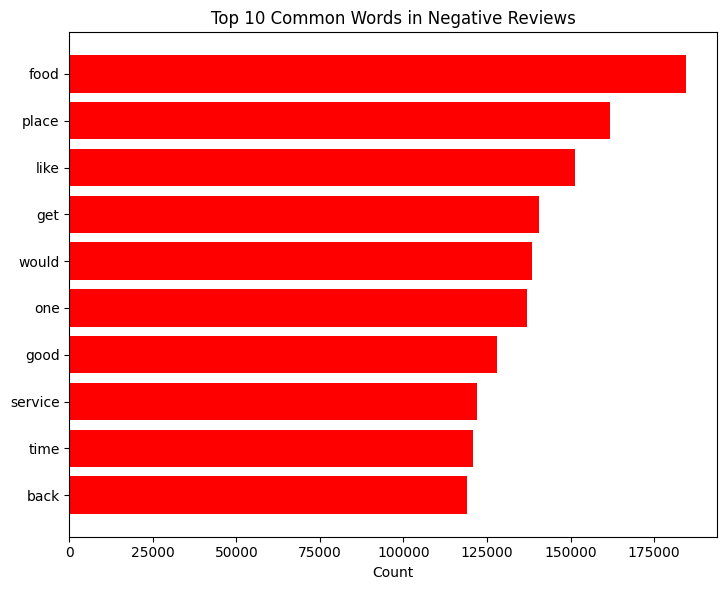

In [ ]:
from collections import Counter
import pandas as pd

# Tokenize the reviews and count the most common words
negative_words = ' '.join(train_df[train_df[0] == 1][1]).split()

# Count the most common words in negative reviews
negative_word_count = Counter(negative_words).most_common(10)

# Convert the counts to a DataFrame for easy plotting
negative_word_df = pd.DataFrame(negative_word_count, columns=['Word', 'Count'])

# Plot the most common words in positive and negative reviews
plt.figure(figsize=(14, 6))

# Negative reviews bar plot
plt.subplot(1, 2, 2)
plt.barh(negative_word_df['Word'], negative_word_df['Count'], color='red')
plt.title('Top 10 Common Words in Negative Reviews')
plt.xlabel('Count')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top

plt.tight_layout()
plt.show()


In [ ]:
# Define some real-world reviews (as examples)
real_reviews = [
    "The service was terrible, and the food was cold. I will never come back!",
    "Absolutely loved the place! The staff was friendly, and the food was amazing!",
    "The experience was okay, but the prices were too high for the quality provided.",
    "Horrible experience! The waiter was rude, and the food was disgusting.",
    "This restaurant is my favorite! Great food, great service, and the ambiance is perfect."
]

# Preprocess the new reviews (apply the same preprocessing steps as before)
preprocessed_reviews = [preprocess_text_step1(review) for review in real_reviews]
preprocessed_reviews = [preprocess_text_step2(review) for review in preprocessed_reviews]

# Vectorize the preprocessed reviews (using the same TF-IDF vectorizer)
real_reviews_tfidf = tfidf.transform(preprocessed_reviews)

# Predict the sentiment of the new reviews
predictions = model.predict(real_reviews_tfidf)

# Print the results
for i, review in enumerate(real_reviews):
    sentiment = "Positive" if predictions[i] == 2 else "Negative"
    print(f"Review: \"{review}\"\nPredicted Sentiment: {sentiment}\n")

Review: "The service was terrible, and the food was cold. I will never come back!"
Predicted Sentiment: Negative

Review: "Absolutely loved the place! The staff was friendly, and the food was amazing!"
Predicted Sentiment: Positive

Review: "The experience was okay, but the prices were too high for the quality provided."
Predicted Sentiment: Negative

Review: "Horrible experience! The waiter was rude, and the food was disgusting."
Predicted Sentiment: Negative

Review: "This restaurant is my favorite! Great food, great service, and the ambiance is perfect."
Predicted Sentiment: Positive

